## Notebook to create plot for all years of a variable

In [1]:
#### conda env Weather_Prediction

import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', None)

In [2]:
PATH_1=os.path.join('..','Results', 'final_dataset_103_features_90th_percentile.pkl') ## read the data
df=pd.read_pickle(PATH_1)
df = df.drop(['MeanLifeExpectency'], axis=1)
df

fips  year  2m dew point temperature       2m temperature  \
0       1001  2003       285.629269414872169  290.863352214209158   
1       1003  2003       289.075082204243699  292.904504754344714   
2       1005  2003        285.84173359686946  291.336096185519921   
3       1007  2003       285.117221444791198  290.369989746752196   
4       1009  2003       284.499985265741145  289.682648936568341   
...      ...   ...                       ...                  ...   
52315  56037  2019       268.877520643594721  277.901787191187623   
52316  56039  2019       267.983749276156061  274.029863958509281   
52317  56041  2019       269.968885872635667  277.701483320934017   
52318  56043  2019       270.298909555129228  277.841302762785233   
52319  56045  2019       272.688739421715468  279.380834986218247   

       Black carbon AOD at 550 nm  Dust AOD at 550 nm      Land-sea mask  \
0                0.00757124815486   0.010371692890225  0.986464531564209   
1               0.007386436848696   0.012786048677104  0.422456727373741   
2               0.007456527906878   0.011317281497259  0.986926074501393   
3               0.007462419865064   0.009395796339033  0.986427446209294   
4               0.007281513555367   0.008532731314996  0.979014066638673   
...                           ...                 ...                ...   
52315           0.004447572668915   0.003451011412093  0.992354963979521   
52316           0.004886699057345   0.001802071901486  0.985416593005752   
52317           0.004674971623685   0.002609903875408  0.982910408852341   
52318           0.005428984507879   0.003225551370174   0.99767985365991   
52319           0.005752716523627   0.005288177473484  0.998191918168665   

       Mean sea level pressure  Organic matter AOD at 550 nm  \
0        101746.46078524258337             0.097522246908886   
1        101714.38567138351209             0.080536809563287   
2       101751.023443022204447             0.094202817435168   
3       101744.124161676227232             0.098690472700501   
4       101752.892546598464833             0.098588406606724   
...                        ...                           ...   
52315   101728.279968551723869             0.041300386367054   
52316   101726.315068890355178             0.047702406526535   
52317   101741.584218587551732             0.044270471406935   
52318     101603.0504883214453              0.05302795015389   
52319   101619.061779472001945             0.058806763140121   

                  PM$_1$         PM$_{2.5}$          PM$_{10}$  \
0      0.000000015615338  0.000000019601377  0.000000027192044   
1      0.000000010517524  0.000000014405518  0.000000020184934   
2      0.000000014401388  0.000000018304776  0.000000025313996   
3      0.000000016317548  0.000000020307433  0.000000028238688   
4      0.000000016634353  0.000000020577427   0.00000002866555   
...                  ...                ...                ...   
52315  0.000000005335923  0.000000006986436  0.000000010275853   
52316  0.000000006090787  0.000000007551662  0.000000010723385   
52317  0.000000005798649  0.000000007329074  0.000000010553171   
52318  0.000000005931365  0.000000007478361   0.00000001067778   
52319  0.000000006511067  0.000000008737487  0.000000012959463   

       Sea salt AOD at 550 nm  Sulphate AOD at 550 nm   Surface geopotential  \
0            0.00860619294015       0.112170314070482   1368.670051439976305   
1           0.013378239581773       0.098994377620422    170.454787516937728   
2           0.009648836533317       0.105918880935702   1263.685437879796154   
3           0.007622676703542       0.115020844565763   1465.598787847873382   
4           0.006934708585955       0.115658964763364   2029.708085049063129   
...                       ...                     ...                    ...   
52315       0.005453571999776       0.023199206535957  21050.679685113027517   
52316       0.005998536443269       0.022471940682464  23557.228

In [3]:
## choose variable to plot

variable = 'Formaldehyde'
min_val = df[variable].min() ## find minimum value
max_val = df[variable].max()  ## find maximum value
print(min_val)
print(max_val)

4.0550643173063363e-10
7.519054642475788e-09


In [4]:
## load state shapefile

SHAPE_PATH = os.path.join('..','Shapefiles','state_shapefile','cb_2018_us_state_500k.shp')
state_shape = gpd.read_file(SHAPE_PATH)

print('The CRS of the SHAPE file is:', state_shape.crs)
## include only CONUS shapefile

remove_state = ['Alaska', 'District of Columbia', 'American Samoa', 'United States Virgin Islands', 'Hawaii', 'Guam', 
                  'Commonwealth of the Northern Mariana Islands', 'Puerto Rico' ]

# Remove rows where the 'NAME' column contains any value from strings
state_shape = state_shape[~state_shape['NAME'].isin(remove_state)]
state_shape.head()

The CRS of the SHAPE file is: EPSG:4269


STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.6432 38.16909, -82.643 38.16956,...

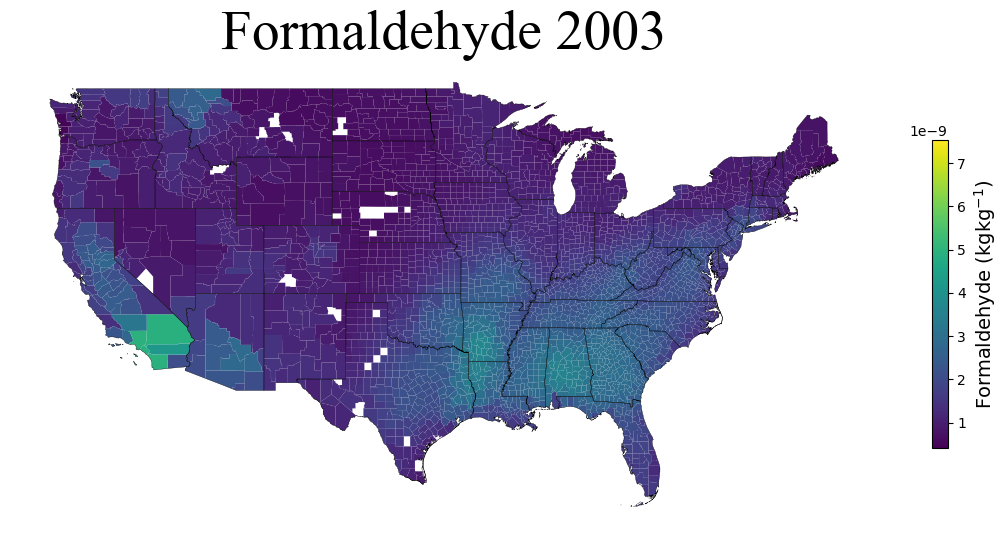

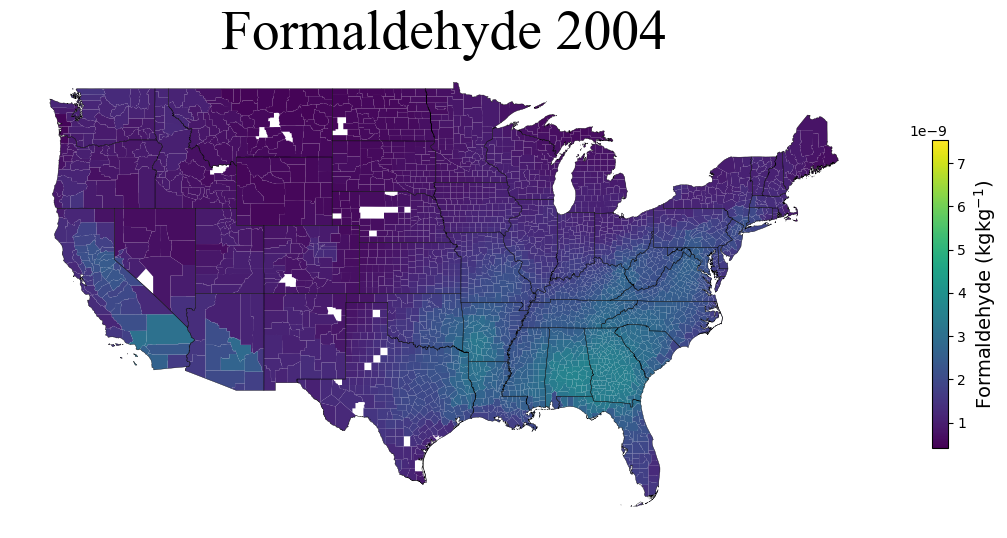

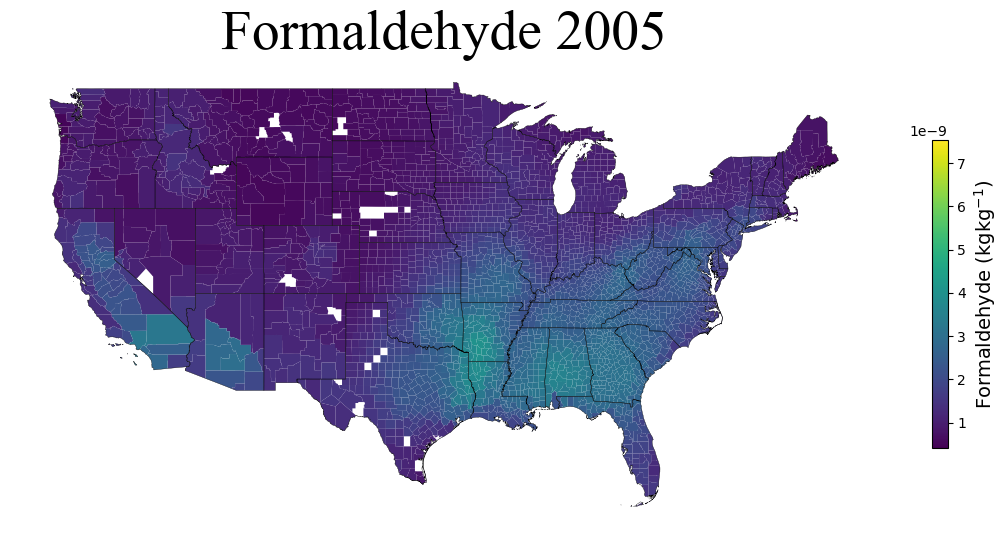

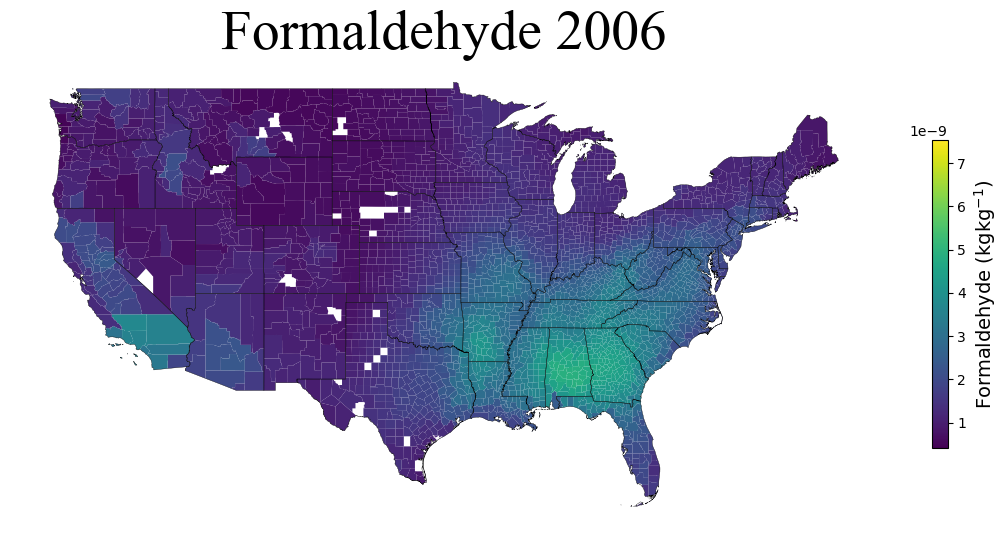

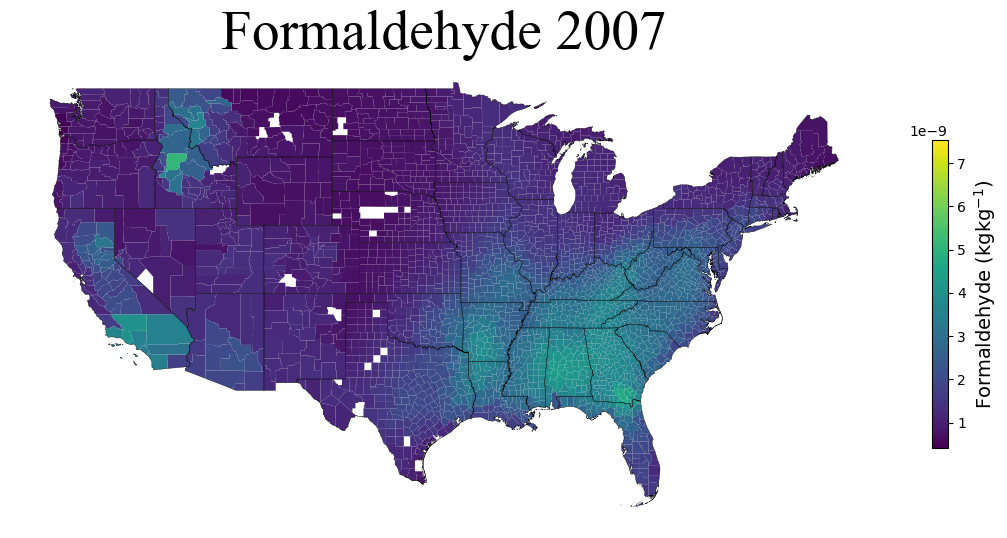

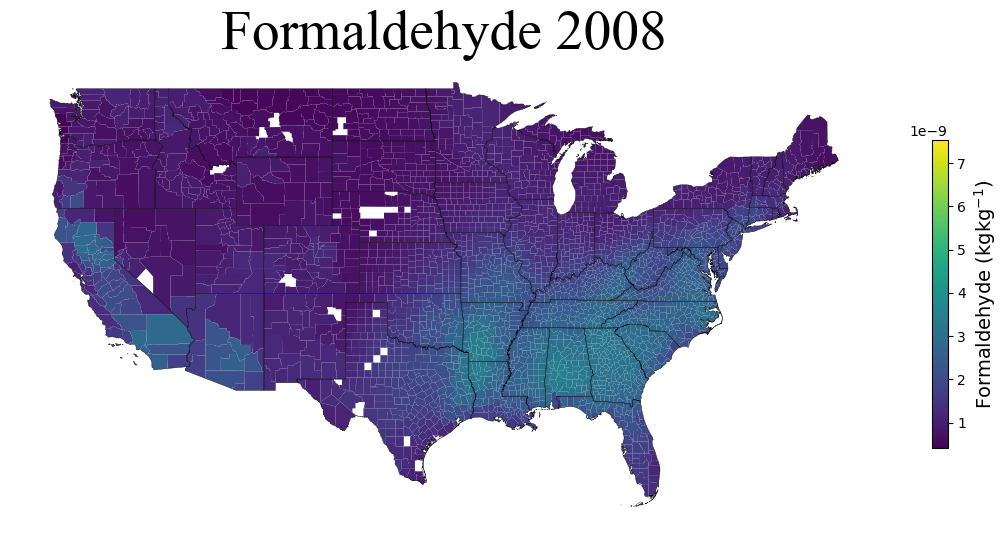

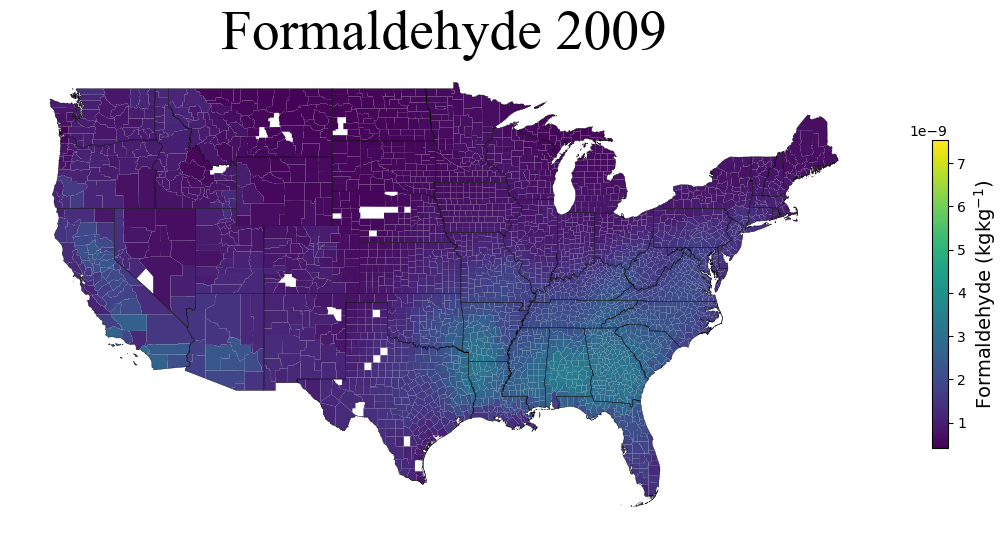

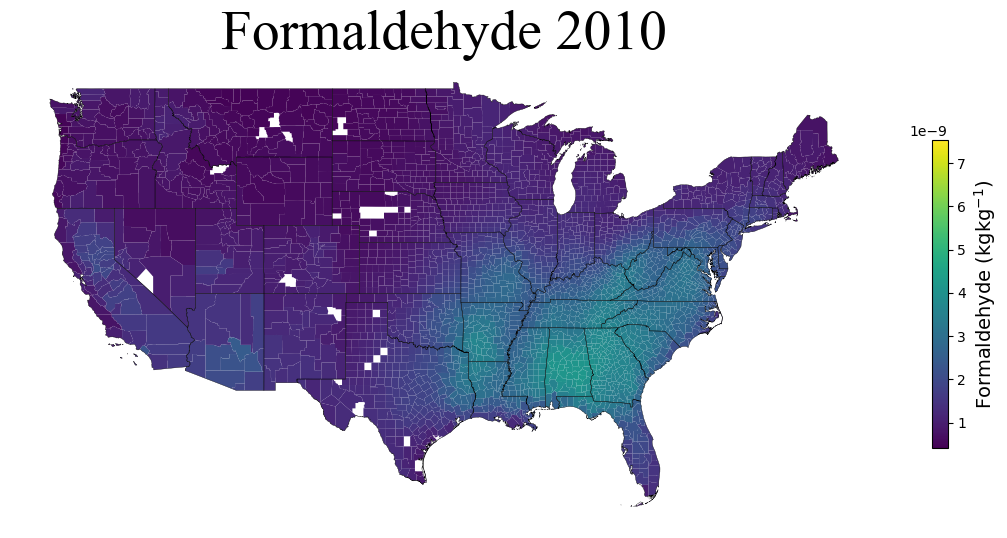

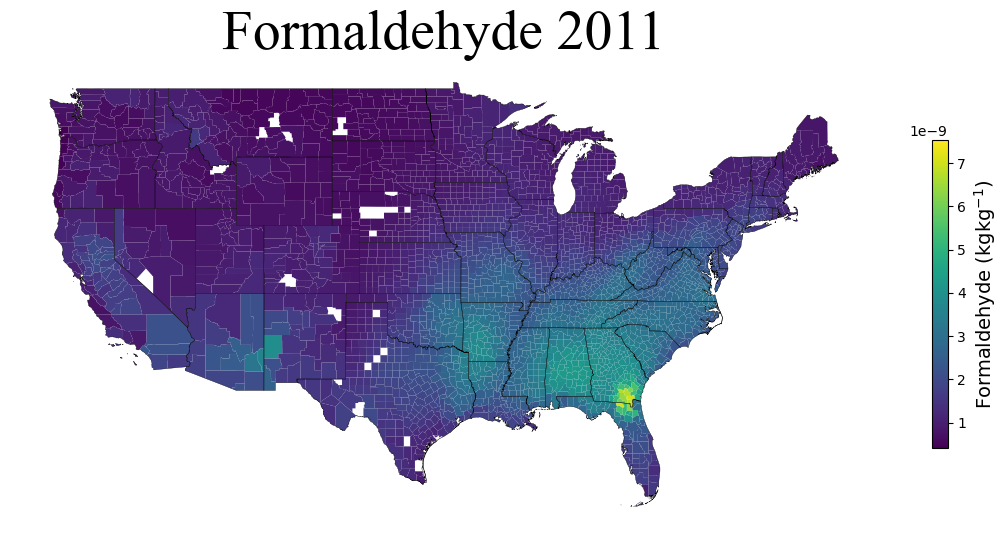

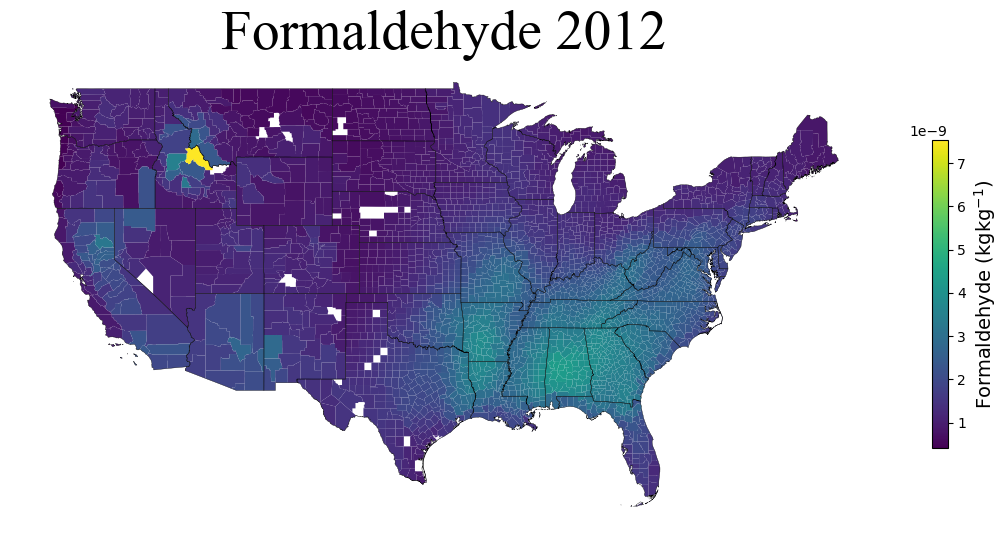

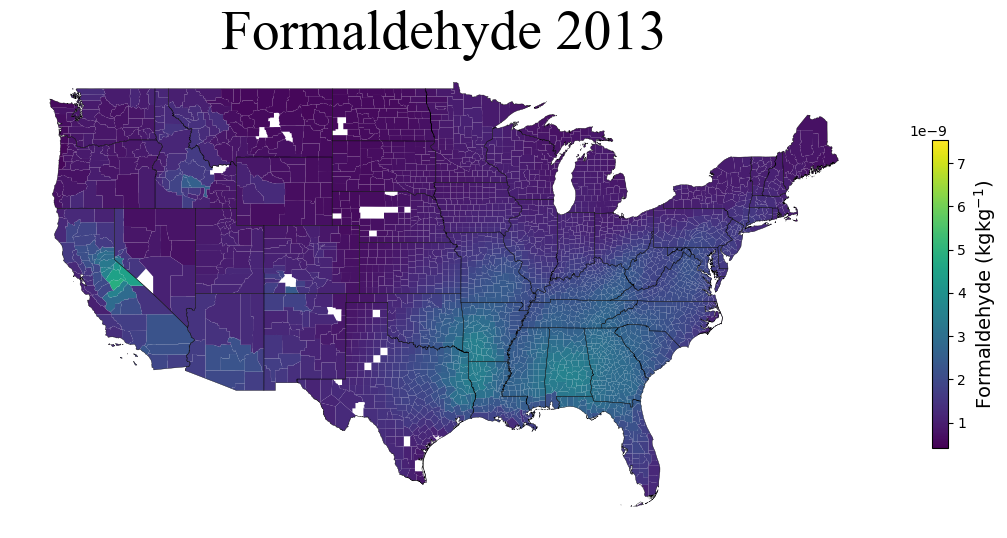

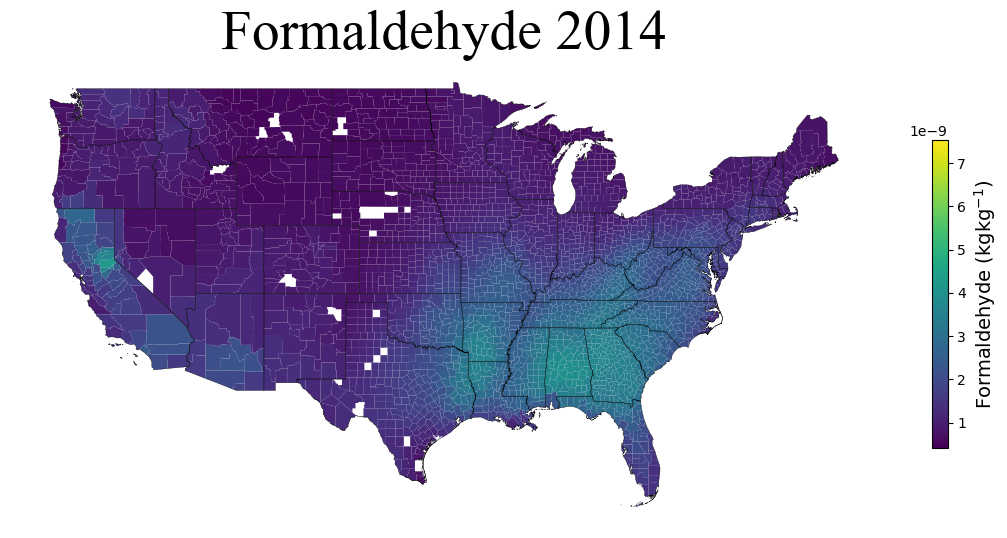

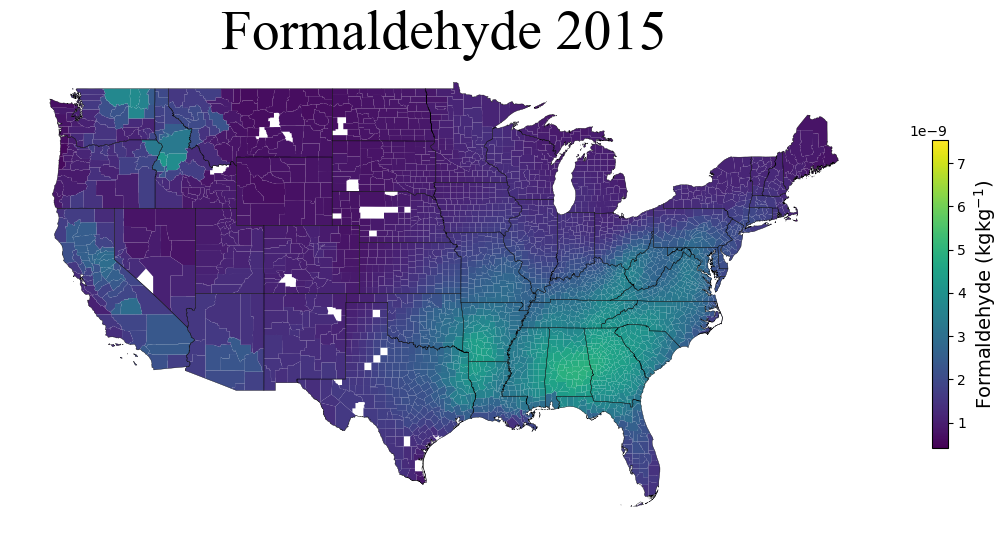

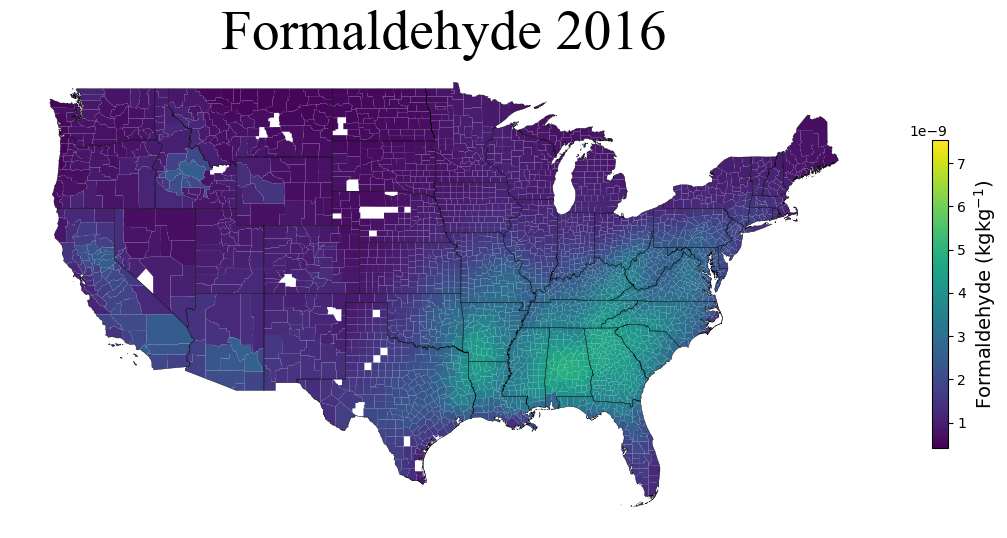

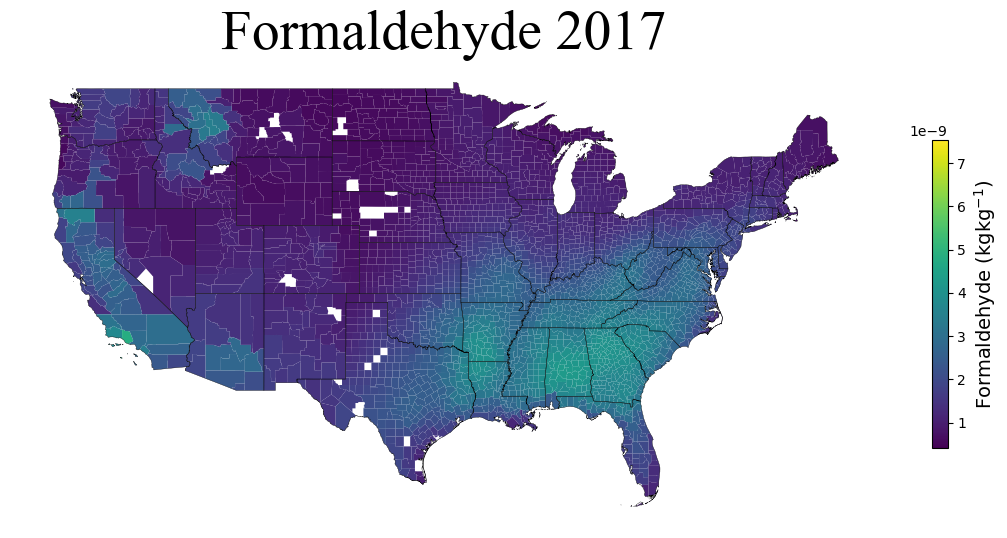

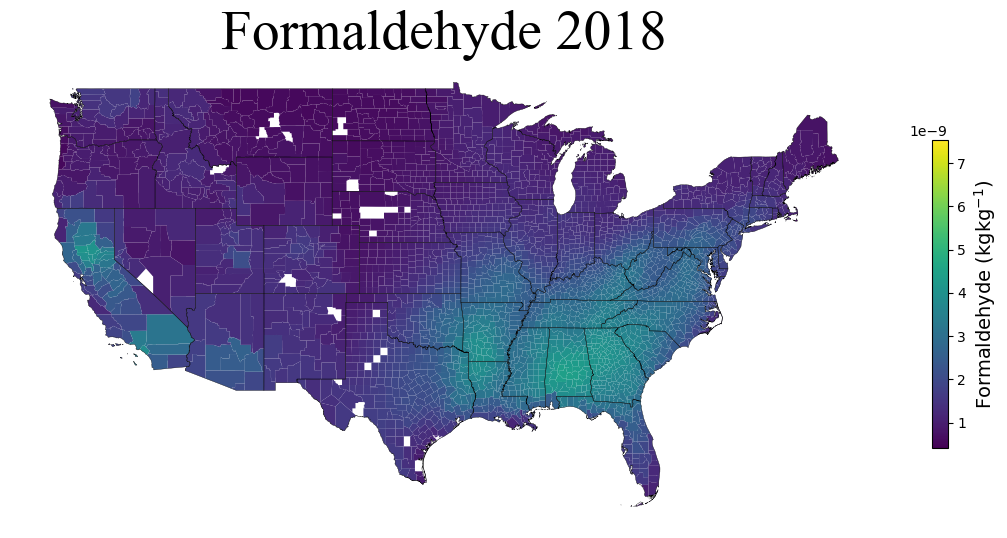

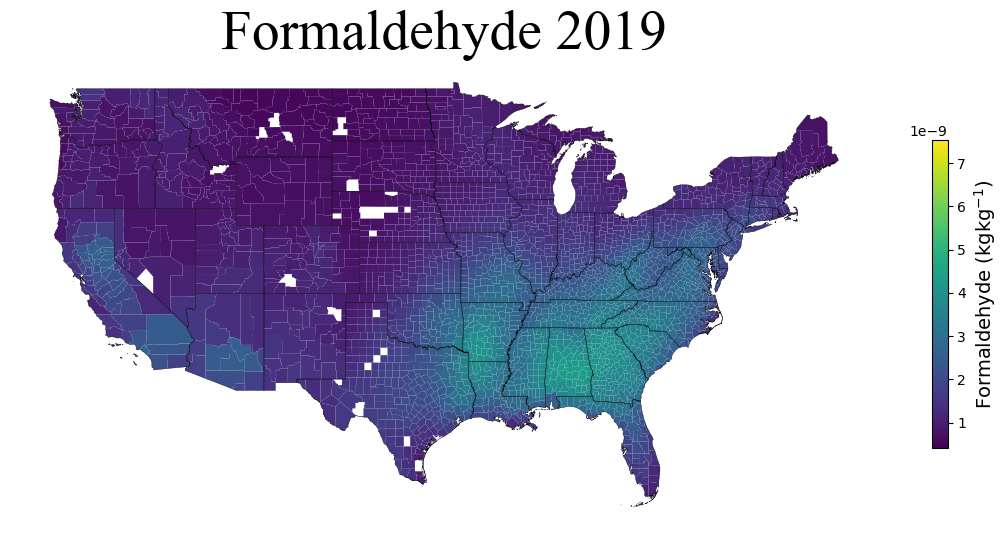

In [5]:
for i in range (2003, 2020):
    select_year = i
    year = str(select_year)
    
    PATH_2=os.path.join('..','Results','CAMS_with_LE', 'LE_'+year +'.csv') ## read the life expectancy data
    le=pd.read_csv(PATH_2)
    
    ## merge life expectency data with the variables by fips
    
    final_df=le.merge(df,how='left', on=['fips', 'year'])
    final_df=final_df.dropna()
    final_df = final_df.drop(['location_name', 'year'], axis=1)

    ## load the county shapefile

    if select_year==2003 or 2004 or 2005 or 2006 or 2007 or 2008 or 2009 or 2010:
        SHAPE_PATH=os.path.join('..','Shapefiles','county_shapefiles','2010_county_shapefile',
                        'gz_2010_us_050_00_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)
        county_gdf = county_gdf.rename(columns={'STATE':'STATEFP','COUNTY':'COUNTYFP'}) ## rename to be consistent with other 

    elif select_year == 2011:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2011_county_shapefile','tl_2011_us_county.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)
    
    elif select_year == 2012:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2012_county_shapefile','tl_2012_us_county.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)
    
    elif select_year == 2013:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2013_county_shapefile','cb_2013_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2014:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2014_county_shapefile','cb_2014_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2015:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2015_county_shapefile','cb_2015_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2016:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2016_county_shapefile','cb_2016_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2017:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2017_county_shapefile','cb_2017_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2018:
        SHAPE_PATH=os.path.join('..','..','..','Shapefiles','county_shapefiles','2018_county_shapefile','cb_2018_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    elif select_year == 2019:

        SHAPE_PATH=os.path.join('..','Shapefiles','county_shapefiles','2019_county_shapefile',
                        'cb_2019_us_county_500k.shp')
        county_gdf = gpd.read_file(SHAPE_PATH)

    else:
        print('no year exist')

    county_gdf['fips']=county_gdf['STATEFP'] + county_gdf['COUNTYFP']
    ## convert the data type
    county_gdf['fips']=county_gdf['fips'].astype(str).astype(int)
    ## convert dtype to int

    county_gdf['STATEFP']=county_gdf['STATEFP'].astype(str).astype(int) 
    county_gdf=county_gdf.loc[:,['STATEFP','geometry','fips']]

    gpd_df = pd.merge(county_gdf, final_df, on='fips', how='left') 
    gpd_df= gpd_df.dropna()

    fig, ax = plt.subplots(1, figsize=(14, 8))
    ax.axis('off') ## remove axis box from map 

    
    ## plot the county shape file
    gpd_df.plot(ax=ax, column = variable,
               legend=True, legend_kwds={"label": variable + ' (kgkg$\\mathrm{^{-1}}$)', 
                           "shrink":0.50}, vmin=min_val, vmax=max_val)
    hfont = {'fontname':'Times New Roman'}
    colorbar_ax = fig.axes[1]
    colorbar_ax.set_ylabel(variable + ' (kgkg$\\mathrm{^{-1}}$)', fontsize=14)

    ## overlay state shapefile
    state_shape.plot(facecolor='none', edgecolor='black', ax=ax, linewidth=0.25)

    ## add a title and annotation
    ax.set_title( variable  +' '+ year, **hfont, fontdict={'fontsize': '40', 'fontweight' : '1'})
    file_name='True_'+ year
    PATH_3 = os.path.join("Formaldehyde", file_name)
    plt.savefig(PATH_3, bbox_inches='tight')